# Predicting Incidences of Diabetes in Women using K-Nearest Neighbour clustering

### Introduction

Diabetes is a condition that causes a blood sugar levels to become too high. It can affect people of any age, race, or sex. It can affect people with any lifestyle.
There are two main types of diabetes:
* Type 1 diabetes - where the body's immune system attacks and destroys the cells that produce insulin.
* Type 2 diabetes - where the body doesn't produce enough insulin, or the body's cells don't react to insulin. *(NHS)*

Diabetes occurs as a result of too much glucose (sugar) being in the blood.  We need gucose, and we get it when our bodies break down the carbohydrates that we eat or drink; that glucose is released into our blood. We also need a hormone called insulin. It’s made by our pancreas, and it’s insulin that allows the glucose in our blood to enter our cells and fuel our bodies.
If you don’t have diabetes, your pancreas senses when glucose has entered your bloodstream and releases the right amount of insulin, so the glucose can get into your cells. But if you have diabetes, this system doesn’t work. *(Diabetes UK)*

When you’ve got Type 1 diabetes, you can’t make any insulin at all. If you’ve got Type 2 diabetes, it’s a bit different. The insulin you make either can’t work effectively, or you can’t produce enough of it.
In both types of diabetes, because glucose can’t get into your cells, it begins to build up in your blood. And too much glucose in your blood causes a lot of different problems. 
Diabetes can be classified using a number of different biological factors.

### Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:
* Number of times pregnant.
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* Diastolic blood pressure (mm Hg).
* Triceps skinfold thickness (mm).
* 2-Hour serum insulin (mu U/ml).
* Body mass index (weight in kg/(height in m)^2).
* Diabetes pedigree function.
* Age (years).
* Class variable (0 or 1).

### K Nearest Neighbour Clustering

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. 

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. (DataCamp)

<img src="https://cdn-images-1.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png" width="250px"/>

Suppose Star is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. (DataCamp)

This project will use KNN clustering, to predict whether a person will have diabeted based on biological indicators.

### Methods

Importing the modules

In [3]:
import pandas as pd #For data maniplulation
import numpy as np #Mathematic purposes
import seaborn as sns #Helpful for visual EDA
import matplotlib.pyplot as plt #Visulaisation
from sklearn.neighbors import KNeighborsClassifier #Machine learning model
from sklearn.model_selection import train_test_split #Splitting data into training and test data
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #For review of accuracy and robustness of model
import os
%matplotlib inline

os.chdir('/Users/roryhurley/Desktop/DataScienceProjects/IndiaDiabetes')

Importing the raw dataset

In [5]:
df = pd.read_csv('DiabetesDataset.csv') # Read in datasets

### Statistical Exploratory Data Analysis

Statistical EDA was initially carried out to asses the dataset and analyzing it to summarize their main characteristics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 observations across 9 colums.
There currently appears to be a full dataset with no missing values.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A statistical summary of the dataset provides a more detailed picture. 
The age range for the women in the study is a good spread from 21 to 81, with an average of 33.2 years old.
The range of pregnancies per woman is from 0-17, with a mean of 3.85. This may seem like a lot, but would be expected in a NIC like India.
There are some interesting discrepancies with the dataset. For a lot of the biological inicators (Glucose, Blood Pressure etc...), the minimum value is 0. It is very unlikely that this is correct, as it is impossible to have, for example, a blood pressure reading of 0. The only column this would be acceptable for is 'Pregnancies' and 'Outcome'. A possible reason for the zero values could be due to missing data points. A look at a subset of the data may confirm this.

In [8]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


As expected, it appears that 0 is likely to have been used where there are no recorded values. Replacing 0 values in these columns with 'NaN' may give a better idea of how complete the dataset is.

In [9]:
# Replace Null ('0') values except 'Pregnancies' and 'Outcome'
df.Glucose.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.DiabetesPedigreeFunction.replace(0, np.nan, inplace=True)
df.Age.replace(0, np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


After replacing the zeros with NaN, it becomes clear that there is in fact a lot of missing data, specifically in the 'Insulin' and 'SkinThickness' columns.
This can be dealt with by omitting these columns, but skin fold thickness and insulin levels are key indicators of diabetes.
It is important to keep these columns, but remove any observations where these are 'NaN'.

In [11]:
# Keep only values with insulin records
all_insulin = df[np.isfinite(df['Insulin'])]

In [12]:
all_insulin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 394 non-null int64
Glucose                     393 non-null float64
BloodPressure               394 non-null float64
SkinThickness               394 non-null float64
Insulin                     394 non-null float64
BMI                         393 non-null float64
DiabetesPedigreeFunction    394 non-null float64
Age                         394 non-null int64
Outcome                     394 non-null int64
dtypes: float64(6), int64(3)
memory usage: 30.8 KB


This is a lot more complete, but there are a few more entries that don't have values. These will be removed too.

In [13]:
# Drop any remainig na values
patients = df.dropna()

patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 392 non-null int64
Glucose                     392 non-null float64
BloodPressure               392 non-null float64
SkinThickness               392 non-null float64
Insulin                     392 non-null float64
BMI                         392 non-null float64
DiabetesPedigreeFunction    392 non-null float64
Age                         392 non-null int64
Outcome                     392 non-null int64
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


Now, we have a complete dataset with no null entries. Although a lot of data has been omitted, there are still 392 complete observations, which is sufficient for analysis. A look at the first 15 entries of this new dataset confirms there is now a clean, complete dataset to work with.

In [14]:
patients.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


### Visual Exploratory Data Analysis

Visual EDA allows us to identify patterns, trends and relationships in the data by assessing visualisations.
Some figures were created using Seaborn to pick up on these.

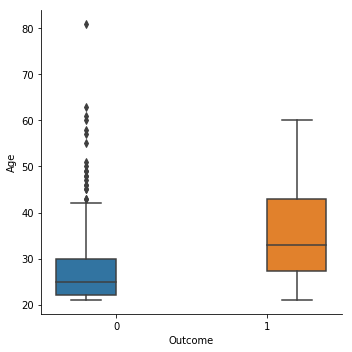

In [15]:
sns.catplot(x="Outcome", y="Age", hue="Outcome", data=patients, kind="box")

It is clear from this plot that age and diabetes are somewhat linked. Whilst there are older women that do not have diabetes, and there are younger women that do have diabetes, the median and interquartile ranges for women that do have diabetes are higher. Perhaps diabetes is more likely as age increases.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


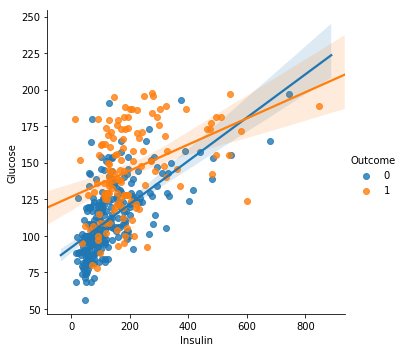

In [16]:
sns.lmplot( x="Insulin", y="Glucose", data=patients, fit_reg=True, hue='Outcome', legend=True)

The scatter plot above shows that there appears to be a positive correlation between glucose and insulin levels. Perhaps unsurprising. However, we can also see some clusetering of diabetics and non-diabetics clearly.

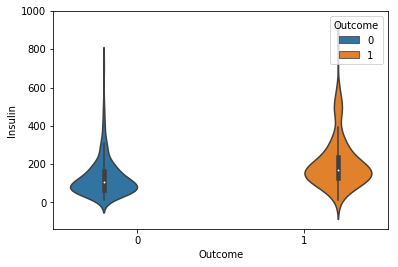

In [17]:
sns.violinplot(x="Outcome", y="Insulin", hue="Outcome", data=patients)

### The Model

After conducting EDA on the data, the KNN model can be built.
The first stage of this is to split the dataframe into two, the columns that will be used to predict the outcome (features) and the outcome itself.

In [18]:
# Create arrays for the features and the response variable
x = patients.drop(['Outcome'], axis=1).values
y = patients['Outcome'].values

As with all supervised machine learning techniques, the data need to be split into test and training datasets.
sklearn contains inbuilt functions that allow the splitting of datasets into training and test sets using the 'test_train_split' method.
This model used a training:test data split of 0.7:0.3.

In [19]:
# Split the data into test and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

As discussed earlier in the notebook, the main feature of using KNN classifier, is that the classification is based on a user-defined parameter; number of neighbours. The model is initiated using a set parameter for how many neighbours to use. This number is arbitary, and therefore it is not clear what number to use in order to ensure the model is robust as possible. A loop was created to test various values (1-15) as number of neighbours.

In [20]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

This effect of changing the number of neighbours on model accuracy is visualised on the figure below.

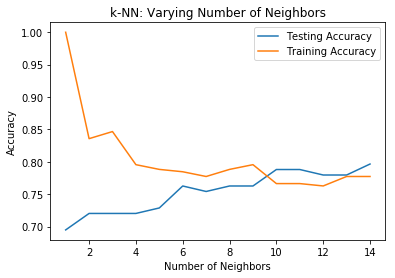

In [21]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

The overall accuracy of the model with the optimim number of neighbours, 9, is shown below.

In [22]:
# Print the accuracy
print("ACCURACY: ")
print(knn.score(x_test, y_test))

ACCURACY: 
0.7966101694915254


This shows that the model has a good accuracy of around 80% of diabetes diagnoses being correct.
However, accuracy is not the sole indicator of model performance. Confusion matrix and classification report give a much better overview of how good the model is.

In [23]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

In [24]:
# Generate the confusion matrix and classification report
print("CONFUSION MATRIX: ") 
print(confusion_matrix(y_test, y_pred))
print(" ")
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred))

CONFUSION MATRIX: 
[[71  8]
 [16 23]]
 
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        79
           1       0.74      0.59      0.66        39

   micro avg       0.80      0.80      0.80       118
   macro avg       0.78      0.74      0.76       118
weighted avg       0.79      0.80      0.79       118



Here we can see that the model correctly classifies diabetes incidence with an overall accurracy of 80%. 

However, this is misleading. The model has a recall of 0.9 for precicting that someone that doesn't have diabetes correctly, and 0.59 for predicting if someone does have diabetes.